In [1]:
## I'm importing the packages that I'll be using throughout this assignment
import pandas as pd
import os
import json
import requests
import numpy as np
import pandas as pd

from functions import *

from lets_plot import *
LetsPlot.setup_html()


In [2]:
sample_historical_data = get_historical_data('GB', 'London', '2021-10-10', '2023-10-10')

In [3]:
# Print out the structure of sample_historical_data to inspect it
print("Top-level keys in the response:", sample_historical_data.keys())

# Check if 'daily' key exists
if 'daily' in sample_historical_data:
    print(f"The 'daily' key exists with sub-keys: {sample_historical_data['daily'].keys()}")
else:
    print("The 'daily' key is missing in the response.")


Top-level keys in the response: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'daily_units', 'daily'])
The 'daily' key exists with sub-keys: dict_keys(['time', 'rain_sum', 'showers_sum'])


In [4]:

print(f"The function returned an object of type: {type(sample_historical_data)}")
print(f"This dictionary has the following keys: {sample_historical_data.keys()}")
print(f"The information I want is under the following keys:")
print(f"  sample_historical_data['daily']['time'] \t\t\t- Sample: {sample_historical_data['daily']['time'][0:3]}")
print(f"  sample_historical_data['daily']['rain_sum'] \t- Sample: {sample_historical_data['daily']['rain_sum'][0:3]}")
print(f"  sample_historical_data['daily']['showers_sum'] \t- Sample: {sample_historical_data['daily']['showers_sum'][0:3]}")

The function returned an object of type: <class 'dict'>
This dictionary has the following keys: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'daily_units', 'daily'])
The information I want is under the following keys:
  sample_historical_data['daily']['time'] 			- Sample: ['2021-10-10', '2021-10-11', '2021-10-12']
  sample_historical_data['daily']['rain_sum'] 	- Sample: [0.0, 0.0, 0.0]
  sample_historical_data['daily']['showers_sum'] 	- Sample: [0.0, 0.0, 0.0]


In [5]:
selected_country = 'GB'
selected_city    = 'London'

In [6]:
latitude, longitude = get_lat_lon(selected_country, selected_city)

In [7]:
print(f"The latitude & longitude of {selected_city} ({selected_country}) are: ({latitude}, {longitude})")

The latitude & longitude of London (GB) are: (51.50853, -0.12574)


In [8]:
url = build_url(latitude, longitude, '2021-10-10', '2023-10-30')
url

'https://historical-forecast-api.open-meteo.com/v1/forecast?latitude=51.50853&longitude=-0.12574&start_date=2021-10-10&end_date=2023-10-30&daily=rain_sum,showers_sum&timezone=auto'

In [9]:
json_data = get_historical_data(selected_country, selected_city, '2021-10-10', '2023-10-10') 

In [10]:
dates    = json_data['daily']['time']
rain_sum = json_data['daily']['rain_sum']
showers_sum = json_data['daily']['showers_sum']

len(dates) == len(rain_sum) == len(showers_sum) == 731

True

In [11]:
json_data = get_historical_data(selected_country, selected_city, '2021-10-10', '2023-10-10') 

final_data = {
    "country"  : selected_country,
    "city"     : selected_city,
    "date"     : json_data['daily']['time'],
    "rain_sum" : json_data['daily']['rain_sum'],
    "showers_sum" : json_data['daily']['showers_sum']
}

with open('../data/daily_rain.json', 'w') as file:
    json.dump(final_data, file)

In [12]:
with open('../data/daily_rain.json', 'r') as file:
    data = json.load(file)

data.keys()

dict_keys(['country', 'city', 'date', 'rain_sum', 'showers_sum'])

In [13]:
df = pd.DataFrame(data)

df.head()

,country,city,date,rain_sum,showers_sum
0,GB,London,2021-10-10,0.0,0.0
1,GB,London,2021-10-11,0.0,0.0
2,GB,London,2021-10-12,0.0,0.0
3,GB,London,2021-10-13,0.0,0.0
4,GB,London,2021-10-14,0.0,0.0


In [14]:
df.tail()

,country,city,date,rain_sum,showers_sum
726,GB,London,2023-10-06,0.0,0.0
727,GB,London,2023-10-07,0.0,0.2
728,GB,London,2023-10-08,0.0,0.0
729,GB,London,2023-10-09,0.0,0.0
730,GB,London,2023-10-10,0.0,0.0


<Axes: xlabel='date'>

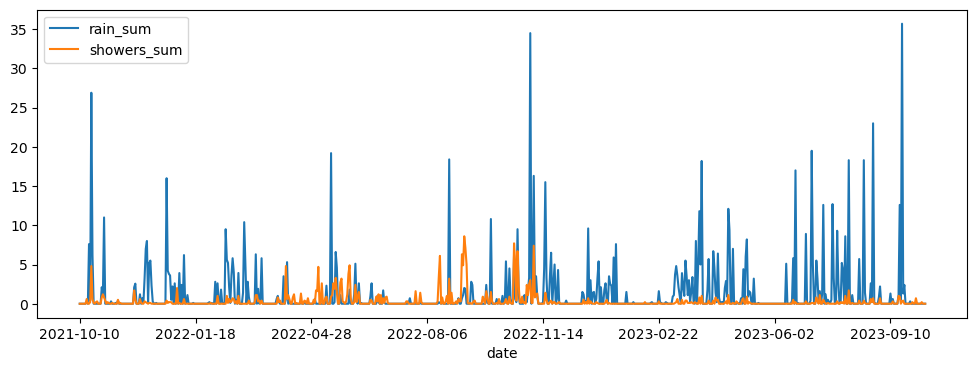

In [15]:
df.plot(x='date', y=['rain_sum', 'showers_sum'], figsize=(12, 4))

In [16]:
print(f"The maximum sum of rain last year was: {df['rain_sum'].max()}")
print(f"The maximum sum of showers last year was: {df['showers_sum'].max()}")

The maximum sum of rain last year was: 35.7
The maximum sum of showers last year was: 8.6


In [17]:
daily_rain = pd.read_json('../data/daily_rain.json')

daily_rain['raininess'] = daily_rain[['rain_sum','showers_sum']].mean(axis=1)

daily_rain.drop(columns=['rain_sum', 'showers_sum'], inplace=True)

csv_file_path = '/files/ds105a-2024-w06-summative-deyavuz/data/london_rain.csv'

daily_rain.to_csv(csv_file_path, index=False)

print(daily_rain)

    country    city       date  raininess
0        GB  London 2021-10-10        0.0
1        GB  London 2021-10-11        0.0
2        GB  London 2021-10-12        0.0
3        GB  London 2021-10-13        0.0
4        GB  London 2021-10-14        0.0
..      ...     ...        ...        ...
726      GB  London 2023-10-06        0.0
727      GB  London 2023-10-07        0.1
728      GB  London 2023-10-08        0.0
729      GB  London 2023-10-09        0.0
730      GB  London 2023-10-10        0.0

[731 rows x 4 columns]
